# **Movie Recommender System**

**Authors:**<br>
Lucy Munge, Frank Mandele, Sylvester Magunda.

## **Project Overview:** 
**Building a Comprehensive Movie Recommendation System**

In this project, our goal is to design and implement a versatile movie recommendation system employing three distinct techniques: a simple recommender, collaborative filtering, and content-based filtering. Leveraging the MovieLens dataset, we aim to provide users with personalized recommendations for the top 5 movies.

The **simple recommender model** will prioritize movies based on their overall popularity. Utilizing metrics such as ratings count, reviews(user ratings) we will generate a list of top movies that have garnered widespread acclaim.

The **collaborative filtering approach** takes center stage as our primary recommender. By analyzing user behavior and preferences, the system will identify similar users or movies, providing recommendations based on collective user experiences. This model is crucial for offering personalized suggestions rooted in user interactions.

To tackle the **cold-start problem**, especially pertinent for new users and items, we will implement a **content-based filtering model**. This approach relies on the intrinsic features of movies, such as genre, director, and actors, to provide recommendations until sufficient user interaction data is accumulated.

The project's success will be evaluated using established metrics such as RMSE and MAE scores, ensuring the effectiveness of each recommendation technique. By combining the strengths of these diverse models, our system aims to deliver accurate and user-centric movie recommendations, enhancing the overall user experience and addressing the challenges posed by the cold-start problem.

## **Business Understanding**

This project centers around optimizing user engagement in the entertainment sector through the development of an advanced movie recommendation system. Leveraging the MovieLens dataset, our objective is to create a recommendation engine that caters to individual preferences, ensuring a personalized and satisfying user experience.

The project encompasses three primary recommendation techniques:

Popularity-based Recommendations: By prioritizing movies based on their global popularity metrics, this technique ensures that users are exposed to widely acclaimed content. The goal is to set a consistent benchmark for user expectations.

Collaborative Filtering as Core Recommender: Positioned as the primary recommender, collaborative filtering analyzes user behavior to identify similar users and movies. This method aims to provide personalized recommendations grounded in collective user experiences, measured by RMSE for accuracy.

Content-Based Filtering for Cold-Start Mitigation: Addressing the challenge of new users or items with limited interaction data, our content-based model uses intrinsic movie features for relevant recommendations. This approach serves as an interim solution until user preferences are well-established, with RMSE as a metric for assessing recommendation accuracy.

The success of the recommendation system will be evaluated predominantly using Root Mean Squared Error (RMSE). This metric will provide a consistent and comprehensive measure of the accuracy and effectiveness of each recommendation technique. Ultimately, our goal is to deliver precise and user-specific movie suggestions, ensuring a seamless and enjoyable entertainment experience for our users.

## **Data Understanding**

Our data source for this project is the MovieLens dataset, a comprehensive collection of user interactions with movies. The dataset includes key information such as user ratings, movie metadata, and user demographics. 

Variables like movie titles, genres, user IDs, and ratings form the core of our data, enabling us to capture user preferences and movie characteristics. Additionally, we have access to metadata encompassing movie details such as genres, tags, and release years.

To ensure the quality of our recommendations, we will conduct thorough data preprocessing, handling missing values and addressing potential outliers. Exploratory Data Analysis (EDA) will be employed to gain insights into the distribution of ratings, user engagement patterns, and feature correlations.

Understanding the temporal aspects of the data, such as trends over time and seasonality, will further inform our recommendation strategies. Given the collaborative nature of our primary recommender, collaborative filtering, we'll delve into user-item interactions to identify patterns and similarities that contribute to accurate personalized recommendations.

With a solid foundation in the MovieLens dataset, we aim to extract meaningful insights, optimize data quality, and lay the groundwork for effective implementation of our recommendation models.

The link to the MovieLens dataset: https://grouplens.org/datasets/movielens/latest/. 

The data are contained in four different files which are all loaded and viewed. The files are `movies.csv`, `ratings.csv`, `links.csv`, and `tags.csv`

## **Data Preprocessing**
### **Importing Libraries**

In [10]:
# Import the necessary libraries
# Basic Libraries
import pandas as pd
import numpy as np
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from math import sqrt
# Text Handling Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

import warnings
warnings.filterwarnings('ignore')

### **Loading Datasets**

**1. Movies Dataset**

In [11]:
# load and view the first 5 rows of movies_csv 
movies_df = pd.read_csv('Data/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
# check a concise summary of the dataset
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


**2. Ratings Dataset**

In [13]:
# load and view the first 5 rows of ratings_csv 
ratings_df = pd.read_csv('Data/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [14]:
# check a concise summary of the dataset
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


**3. Links Dataset**

In [15]:
# load and view the first 5 rows of links_csv 
links_df = pd.read_csv('Data/links.csv')
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [16]:
# check a concise summary of the dataset
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


**4. Tags Dataset**

In [17]:
# load and view the first 5 rows of tags_csv 
tags_df = pd.read_csv('Data/tags.csv')
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [18]:
# check a concise summary of the dataset
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [19]:
# check the popularity of each unique element in tag column
tags_df['tag'].value_counts()

In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
                    ... 
con artists            1
Macaulay Culkin        1
mountain climbing      1
Disturbing             1
money                  1
Name: tag, Length: 1589, dtype: int64

Some observations from dataset:
- The most popular tag is "In Netflix queue". However, this is not important in our future analysis since it doesn't really explain a specific genre of movie and the tag can apply in any kind of a movie.
- We will mainly focus on movies_df and ratings_df. We need to merge them to have movie names in our merged dataset.

### **Exploratory Data Analysis and Data Cleaning**

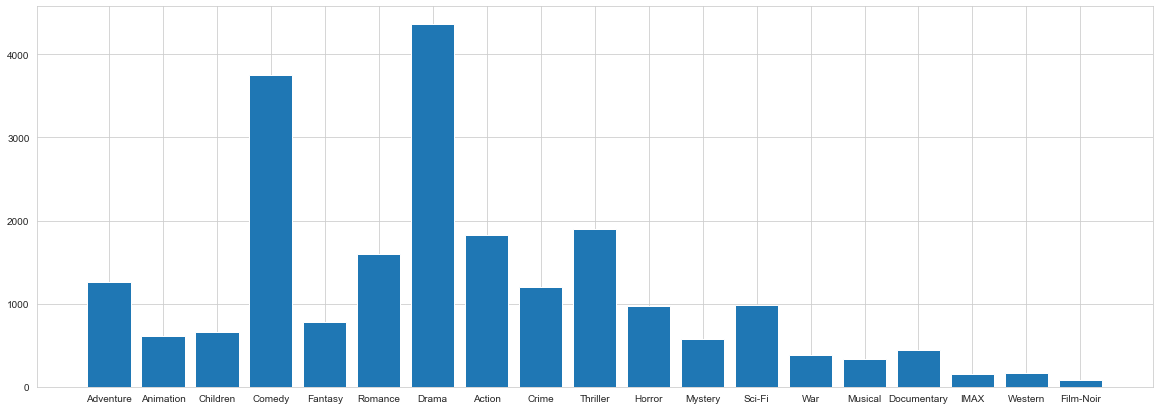

In [20]:
# bar graph showing most popular genres of movie released 
plt.figure(figsize=(20,7))
genre_list = movies_df['genres'].apply(lambda genre_list_movie : str(genre_list_movie).split("|"))
genre_counts = {}

for genre_list_movie in genre_list:
    for genre in genre_list_movie:
        if(genre_counts.get(genre,False)):
            genre_counts[genre]=genre_counts[genre]+1
        else:
            genre_counts[genre] = 1       
genre_counts.pop("(no genres listed)")
plt.bar(genre_counts.keys(),genre_counts.values());

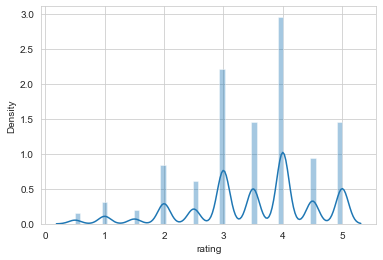

In [21]:
# create a distribution plot for users rating
sns.distplot(ratings_df["rating"]);

Generally, most movies were rated 4 while the rating with the least number of movies was 0.5

In [22]:
# merge ratings_df and movies_df

merged_df = pd.merge(movies_df, ratings_df, on='movieId', how='inner')
merged_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [23]:
# drop the timestamp column
merged_df = merged_df.drop('timestamp', axis=1)


- ratings_df  has **timestamp** column. We dont use this feature for the future analysis. It can therefore be dropped.

In [24]:
# check a concise summary of the merged dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   title    100836 non-null  object 
 2   genres   100836 non-null  object 
 3   userId   100836 non-null  int64  
 4   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [25]:
# check for null values
merged_df.isna().sum()

movieId    0
title      0
genres     0
userId     0
rating     0
dtype: int64

- There are no null values in the merged dataset
- The dropping was successfull because the number of columns reduced from 6 to 5

In [26]:
# check the total value of each unique element in the userId column
merged_df['userId'].value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
406      20
595      20
569      20
431      20
442      20
Name: userId, Length: 610, dtype: int64

- **userId 414** is the most popular user in the dataset, appearing 2698 times. There are several number of users appearing least in the dataset, that is 20 times.

In [27]:
# removing release year from movie title
merged_df['year'] = merged_df['title'].str.extract('.*\((.*)\).*',expand = False)
merged_df['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', nan, '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908', '2006–2007'], dtype=object)

In [28]:
# changing 2006-2007 to 2007
merged_df['year'] = merged_df['year'].replace('2006–2007','2007')
merged_df['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', nan, '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908'], dtype=object)

- Logically, if a movie was released between 2006 and 2007 then the latest year serves as the release year. We didn't drop the record since we wanted to stick with the original data as much as possible for accuracy purposes.

In [29]:
# checking for null values in the new dataset
merged_df.isna().sum()

movieId     0
title       0
genres      0
userId      0
rating      0
year       17
dtype: int64

- The year column has 17 null values

In [30]:
# view the records with no year values
nullyears_df = merged_df[pd.isna(merged_df['year'])]
nullyears_df

,movieId,title,genres,userId,rating,year
81292,40697,Babylon 5,Sci-Fi,210,4.0,NaN
81293,40697,Babylon 5,Sci-Fi,528,0.5,NaN
99325,140956,Ready Player One,Action|Sci-Fi|Thriller,209,3.5,NaN
99326,140956,Ready Player One,Action|Sci-Fi|Thriller,305,4.5,NaN
99327,140956,Ready Player One,Action|Sci-Fi|Thriller,380,3.0,NaN
99328,140956,Ready Player One,Action|Sci-Fi|Thriller,514,3.0,NaN
99459,143410,Hyena Road,(no genres listed),448,2.0,NaN
99526,147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),105,5.0,NaN
99617,149334,Nocturnal Animals,Drama|Thriller,306,3.0,NaN
99799,156605,Paterson,(no genres listed),567,4.5,NaN


In [31]:
# drop the records that don't have release year
merged_df = merged_df.dropna(subset=['year'],how='any')
merged_df['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', '1903', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '1908'], dtype=object)

In [32]:
# checking summary of the dataset to confirm there are no null records
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100819 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100819 non-null  int64  
 1   title    100819 non-null  object 
 2   genres   100819 non-null  object 
 3   userId   100819 non-null  int64  
 4   rating   100819 non-null  float64
 5   year     100819 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 5.4+ MB


In [33]:
# checking for duplicates
merged_df.duplicated().sum()

0

- There are no duplicates

In [34]:
# exporting the clean merged dataframe to a csv file
merged_df.to_csv('merged_df.csv',index=False)

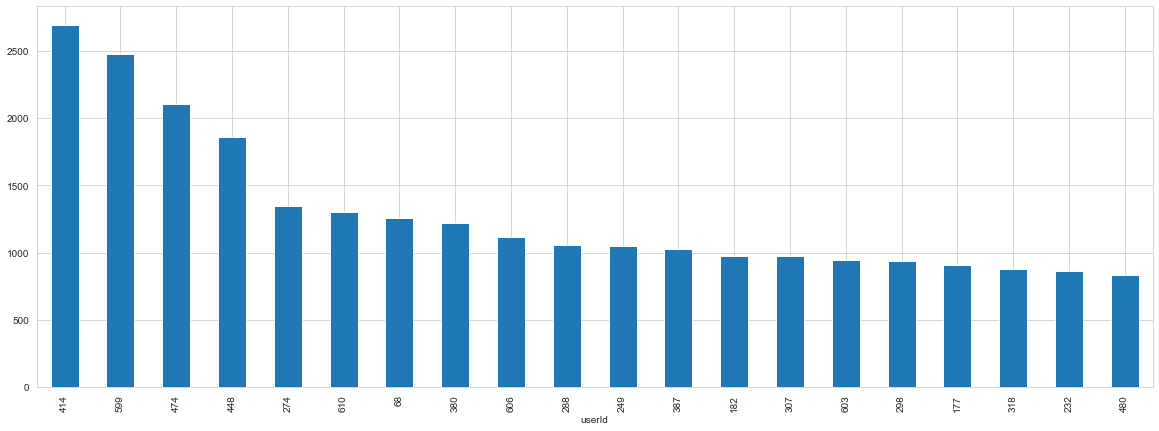

In [35]:
# grouping the rating based on user

ratings_by_users = merged_df.groupby('userId').agg({'rating': [np.size, np.mean]})
ratings_by_users['rating']['size'].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = (20,7));

- The above graph displays users who rated mostly with user 414 rating most

In [36]:
# checking the details of the most rating user
user_414 = merged_df[merged_df['userId'] == 414]
user_414


,movieId,title,genres,userId,rating,year
146,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,414,4.0,1995
281,2,Jumanji (1995),Adventure|Children|Fantasy,414,3.0,1995
361,3,Grumpier Old Men (1995),Comedy|Romance,414,4.0,1995
414,5,Father of the Bride Part II (1995),Comedy,414,2.0,1995
502,6,Heat (1995),Action|Crime|Thriller,414,3.0,1995
...,...,...,...,...,...,...
100691,180045,Molly's Game (2017),Drama,414,4.0,2017
100701,180497,The Post (2017),Drama|Thriller,414,4.0,2017
100705,180985,The Greatest Showman (2017),Drama,414,3.5,2017
100762,184791,Fred Armisen: Standup for Drummers (2018),Comedy,414,2.5,2018


- From the top 5 and last 5 last records of user_414, it is clear that averagely the ratings were bewteen 2-4

In [37]:
# grouping the ratings based on movies
ratings_by_movies = merged_df.groupby('title').agg({'rating': [np.size, np.mean]})
ratings_by_movies

rating          
                                            size      mean
title                                                     
'71 (2014)                                   1.0  4.000000
'Hellboy': The Seeds of Creation (2004)      1.0  4.000000
'Round Midnight (1986)                       2.0  3.500000
'Salem's Lot (2004)                          1.0  5.000000
'Til There Was You (1997)                    2.0  4.000000
...                                          ...       ...
eXistenZ (1999)                             22.0  3.863636
xXx (2002)                                  24.0  2.770833
xXx: State of the Union (2005)               5.0  2.000000
¡Three Amigos! (1986)                       26.0  3.134615
À nous la liberté (Freedom for Us) (1931)    1.0  1.000000

[9707 rows x 2 columns]

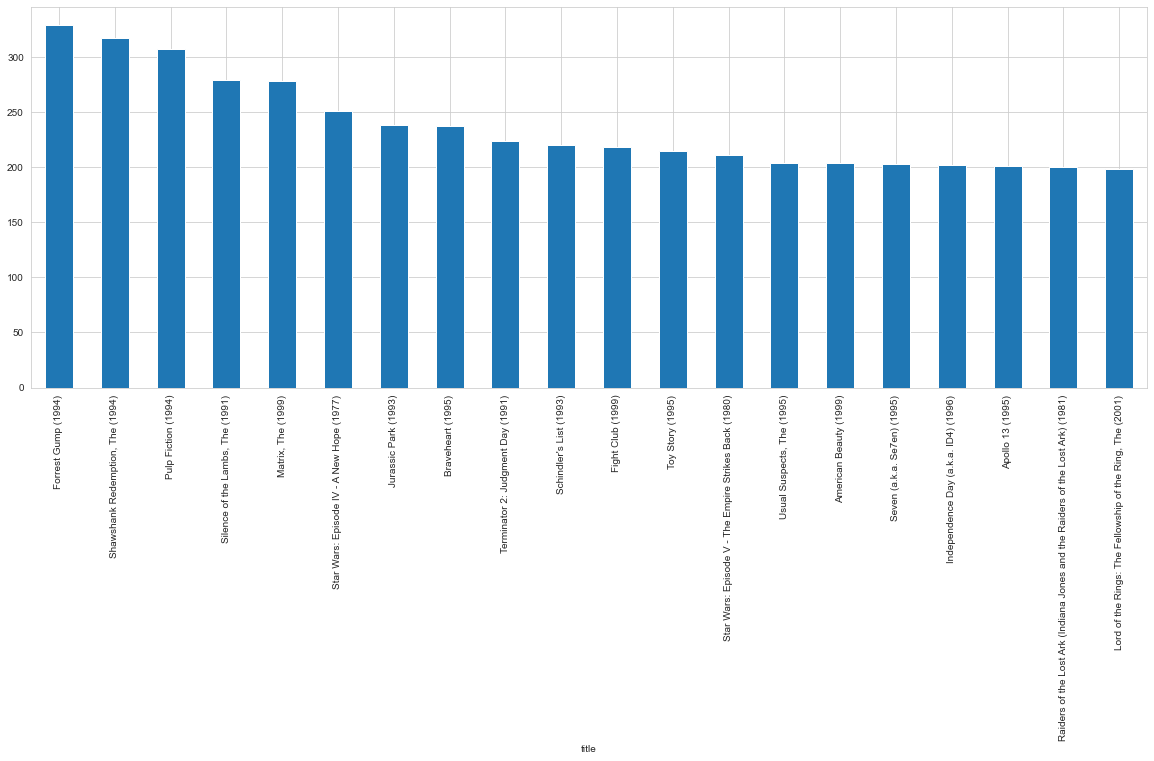

In [38]:
# most rated movies 
ratings_by_movies['rating']['size'].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = (20,7));

- Movie ratings are unevenly distributed, with the film "Forrest Gump" being the most rated, receiving approximately 350 ratings.

In [39]:
# check the most popular movies 
popular_ratings_by_movies = ratings_by_movies[ratings_by_movies['rating']['size']>200]
popular_ratings_by_movies['rating']['mean'].sort_values( ascending=False).head(10)

title
Shawshank Redemption, The (1994)                         4.429022
Fight Club (1999)                                        4.272936
Usual Suspects, The (1995)                               4.237745
Star Wars: Episode IV - A New Hope (1977)                4.231076
Schindler's List (1993)                                  4.225000
Star Wars: Episode V - The Empire Strikes Back (1980)    4.215640
Pulp Fiction (1994)                                      4.197068
Matrix, The (1999)                                       4.192446
Forrest Gump (1994)                                      4.164134
Silence of the Lambs, The (1991)                         4.161290
Name: mean, dtype: float64

- Utilizing the **ratings_by_users** and **ratings_by_movies** tables will provide insights into which movies are highly appreciated or well-reviewed in our database. This information will be employed in subsequent sections for further analysis.

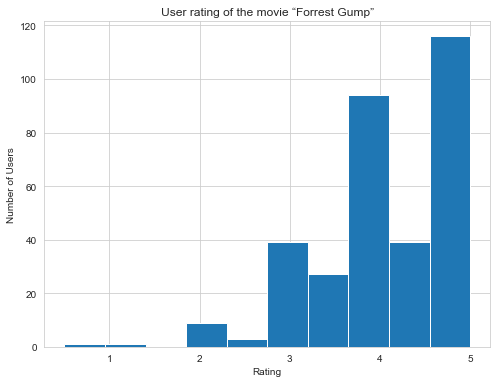

In [40]:
# User rating of the movie “Forrest Gump”

plt.figure(figsize=(8,6))
movies_grouped = merged_df.groupby('title')
Forrest_Gump = movies_grouped.get_group('Forrest Gump (1994)')
Forrest_Gump['rating'].hist()
plt.title('User rating of the movie “Forrest Gump”')
plt.xlabel('Rating')
plt.ylabel('Number of Users')

plt.show()



- Most of the '**Forrest Gump**' audience ratings are 4 and 5.

- The genres column contains multiple genres.As a result, we need to separate them to conduct a meaningful analysis.

In [41]:
# split and check the value count for each genre
genre_popularity = (movies_df.genres.str.split('|')
                      .explode()
                      .value_counts()
                      .sort_values(ascending=False))
genre_popularity.head(10)

Drama        4361
Comedy       3756
Thriller     1894
Action       1828
Romance      1596
Adventure    1263
Crime        1199
Sci-Fi        980
Horror        978
Fantasy       779
Name: genres, dtype: int64

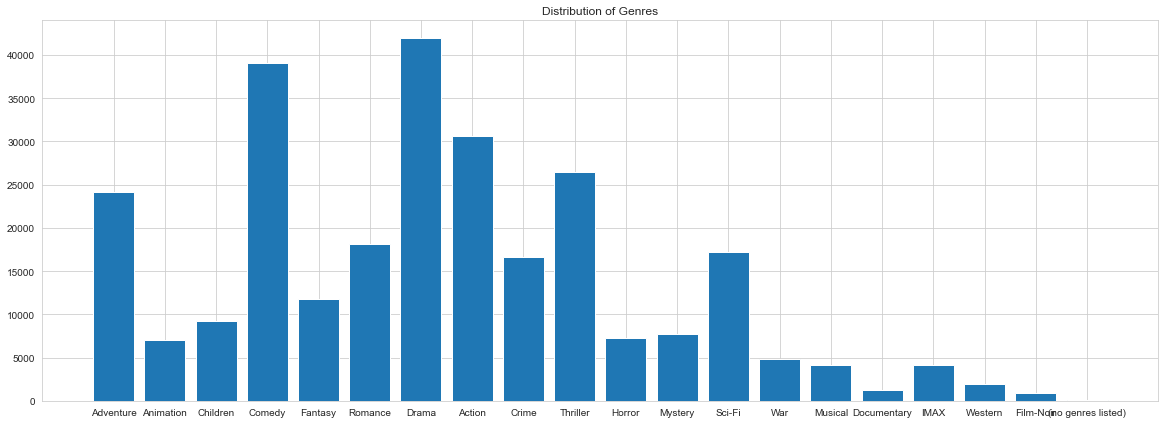

In [42]:
# distribution of genres

plt.figure(figsize=(20,7))
genres = merged_df['genres'].apply(lambda genres_movie : str(genres_movie).split("|"))

genres_count = {}
for genres_movie in genres:
    for genre in genres_movie:
        if(genres_count.get(genre,False)):
            genres_count[genre]=genres_count[genre]+1
        else:
            genres_count[genre] = 1       
plt.bar(genres_count.keys(),genres_count.values());
plt.title('Distribution of Genres');


- The majority of movies fall into the genre of Drama, with Comedy coming next, followed by Action, Thriller, and Adventure.

In [43]:
# the average rating for the entire dataset
merged_df.rating.mean()

3.501547327388687

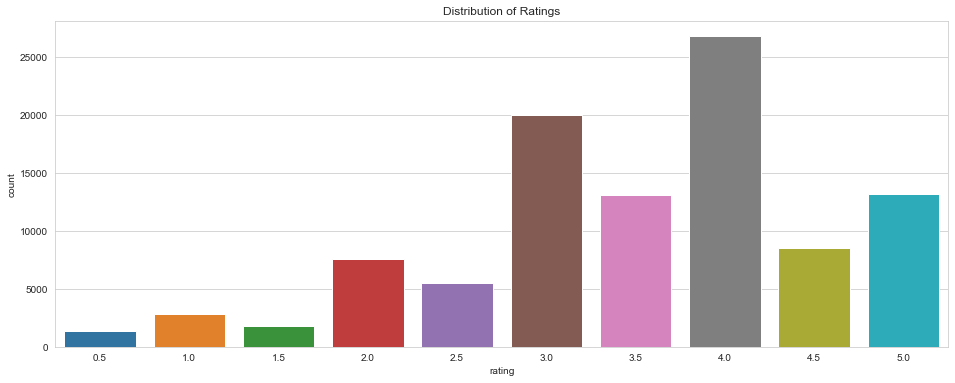

In [44]:
# distribution of ratings
plt.figure(figsize=(16,6))
sns.countplot(merged_df['rating'])
plt.title('Distribution of Ratings');

- The mean rating is 3.50 on a scale of 5.
- It seems that ratings are not normally distibuted.
- Nearly half the movies have a rating between 4 and 5.

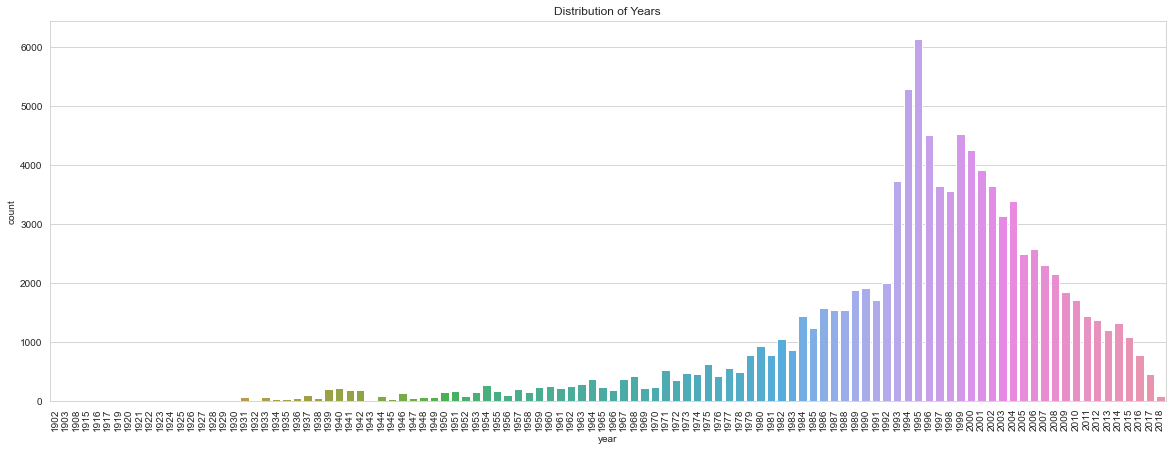

In [45]:
# distribution of year
df_year_asc = merged_df.sort_values('year' , ascending = True)
plt.figure(figsize=(20,7))
sns.countplot(df_year_asc['year'])
plt.xticks(rotation=90)
plt.title('Distribution of Years');

- The dataset encompasses movies dating back to 1902, with the most recent film recorded in 2018. Among the years 1993 to 2004, the year with the highest number of rated movies in this dataset is notable.

# **Making Recommendation Systems**
 Now that we have had a good feel of our data, we can go ahead and build our recommendation systems. We will start with the simplest of the techniques which is the popularity-based recommendation system

### **Simple Recommendation System(Popularity-Based)**

This method is a basic system that recommends the top items based on a certain metric or score. Simple recommenders offer generalized recommendations to every user, based on movie popularity and/or genre. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. It's also worth noting that this technique can be quite handy with cold-start problems since previous user interactions is not necessary. 

That being said, we'll only be working with `movie.csv` and  `ratings.csv` for this section since our columns of interest are `title` and `ratings`. We'll start with merging the two dataframes using `movieId` so we can have them in one place before doing anything else.

In [46]:
# Step 1. Merge movies.csv and ratings.csv into movie_data
movie_data = pd.merge(ratings_df, movies_df, on='movieId')
# Preview merged df
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


Our movie_data dataframe is perfectly merged. In the next steps, we will try to create our Simple Recommender System from scratch following a criteria that will be based on:
* Movies with the highest ratings (Metric we'll use determine popularity)
* Ratings count

In the cells that follow for this section, we will be:
* Grouping our movies_data by movie titles and getting means(since different users gave the same movie different ratings)
* Sorting the table in ascending order using ratings column
* Getting ratings count using `.count()` and adding `average_ratings_count` column to our table
* Implementing a criteria that only takes movies with 3.5 star ratings and above and have at least a rating count of 50 

Using the above criteria, we'll set a threshold that will determine if a movie is popular and therefore gets to be recommended to users.


In [47]:
# Get average ratings
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

We have been able to get our popular movies sorted from highest rating to lowest. However, this alone does not answer the question of popular movies since some of the high ratings might be means from a handful of users or even a single user and therefore doesn't truly reflect the true picture of populality which is what we are interested in. 

To handle this issue, we will be getting the ratings count using `.count()` so as to get the number of users which we'll later on use in our threshold to get what is popular based on numbers.(We're assumming movies with relatively higher rating counts and high ratings are popular).

In [48]:
# Get ratings count
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

With ratings count, we can already see the movies that had the highest ratings didn't particularly have high ratings count. It is however, possible that users that watched the movies that had a 5 star rating might've been reluctant to provide movie ratings for some reason hence the lower ratings count, but judging from what we had the EDA(Exploratory Data Analysis) section, the movies that had many users rating them appeared to perform fairly well so our assumption on popularity might be largely correct. Besides, this assumption does a fairly good job of handling the bias problem of considering high ratings with  by significantly few users as popular since we are more focused on the what the majority of users made of the movies.

In [49]:
# # Add average rating count to our table
# movie_data[['title', 'rating']]

In [50]:
# Calculate ratings mean
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
# Preview
ratings_mean_count

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
...,...
eXistenZ (1999),3.863636
xXx (2002),2.770833
xXx: State of the Union (2005),2.000000


In [51]:
# Rounding ratings column to 1dp
ratings_mean_count['rating'] = round(ratings_mean_count['rating'], 1)
ratings_mean_count.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [52]:
# Calculating count of the ratings and add the average ratings above
ratings_mean_count['ratings_count'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
ratings_mean_count.head()

,rating,ratings_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [53]:
# Setting threshold for popular movies
ratings_mean_count = ratings_mean_count[(ratings_mean_count['rating'] > 3.5) & (ratings_mean_count['ratings_count'] > 150)]
ratings_mean_count.head()

,rating,ratings_count
title,,
Aladdin (1992),3.8,183
American Beauty (1999),4.1,204
Apollo 13 (1995),3.8,201
Back to the Future (1985),4.0,171
Braveheart (1995),4.0,237


In [54]:
# Sorting popular movies in ascending order by rating
popular_movies = ratings_mean_count.sort_values(by='rating', ascending=False)
# Preview
popular_movies

,rating,ratings_count
title,,
"Shawshank Redemption, The (1994)",4.4,317
"Godfather, The (1972)",4.3,192
Fight Club (1999),4.3,218
"Matrix, The (1999)",4.2,278
Star Wars: Episode V - The Empire Strikes Back (1980),4.2,211
Star Wars: Episode IV - A New Hope (1977),4.2,251
"Silence of the Lambs, The (1991)",4.2,279
Schindler's List (1993),4.2,220
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),4.2,200


Finally we have our Simple recommendation model that recommends top movies. This model however has a major downside, it fails to provide personalized recommendations. All users get recommendations of what is popular and since tastes are subjective this approach fails to provide a solution to user engagement problem.

In the next sections, we will be focusing on more personalized recommendations approaches.

## **Collaborative Filtering**

In collaborative filtering, the system analyzes information about preferences, behaviour, and activities of all users to predict what you might like. Simply put, the system recommends items that other users with similar tastes and behaviour liked. The main assumption of this method is that people who liked similar products in the past will also like similar products in the future.

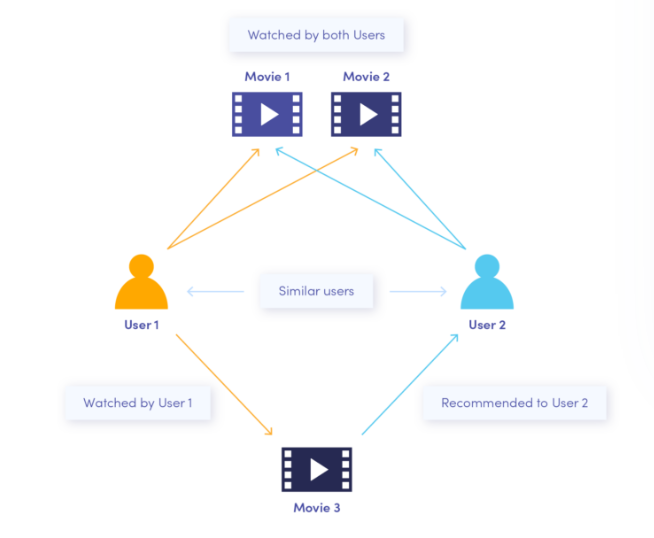

Image source: https://www.miquido.com/wp-content/uploads/2023/06/image-1-700x681.png.webp

This approach prides itself on its adaptive nature as the system captures changes in users' interests besides recommending products without any analysis of the product itself. This implies that the content of the product is not required to be in any way understood nor described by the the creator of the system noe the system itself.

The information that will be of interest in this model with the `movies` list and `ratings` given by users.
We will be transforming the dataset into something compatible with surprise. In order to do this we'll remove the 'timestamp' column that will not be needed in our recommender analysis, we will also need Reader and Dataset classes. There's a method in Dataset specifically for loading dataframes.

In [55]:
# Import relevant dependencies
import pandas as pd
import numpy as np
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV

In [56]:
# Load data and drop 'timestamp column'
ratings_df = pd.read_csv('Data/ratings.csv')

# Drop unnecessary column
ratings_df.drop(columns='timestamp', inplace=True)

In [57]:
# Read in values as Surprise dataset
reader = Reader()
data = Dataset.load_from_df(ratings_df, reader)

One of the first decisions is item-item similarity versus user-user similarity. We'll be checking the number of unique users and unique items in our dataset. If using neighborhood methods(Memory-Based methods), this helps us determine whether or not we should perform user-user or item-item similarity.
That being said, for the sake of computation time, we'll be calculating the similarity between whichever number is fewer between users and items.

In [58]:
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  610 

Number of items:  9724


There are clearly way more items than users. We will be taking this into account when inputting the specifications to our similarity metrics. Because we have fewer users than items, it will be more efficient to calculate user-user similarity rather than item-item similarity.

## **Determine the Best Model**

Now that we have our dataset format already set for computation and checked the users and items, the next thing will be to use different models and see whic one performs best, which will then be used later on to perform training. For the purposes of being consistent throughout this step, the metric we intend to use will be RMSE to evaluate our models to check how well the models perform. 

### ***Singular Value Decomposition (SVD)***

In [59]:
# Perform a Gridsearch with SVD to find optimal parameters
params = {'n_factors': [20, 50, 100], 
          'reg_all':[0.02, 0.05, 0.1]}
gs_svd = GridSearchCV(SVD, param_grid=params, n_jobs=-1) #-1 ensures all CPU cores are used during computations, this option may take more time
gs_svd.fit(data)

In [60]:
# Print out optimal parameters
print(gs_svd.best_score)
print(gs_svd.best_params)

{'rmse': 0.8695538924202193, 'mae': 0.6682762583777284}
{'rmse': {'n_factors': 50, 'reg_all': 0.05}, 'mae': {'n_factors': 50, 'reg_all': 0.05}}


### ***KNNBasic***

In [61]:
# Cross-validating with KNNBasic
knn_basic = KNNBasic(sim_options={'name':'pearson', 'user_based':True})
cv_knn_basic = cross_validate(knn_basic, data, n_jobs=-1)

In [62]:
# Printing the average RMSE score for the test set
for i in cv_knn_basic.items():
    print(i)
print('---------------------------------------')
print("Average RMSE: ", np.mean(cv_knn_basic['test_rmse']))

('test_rmse', array([0.96461597, 0.96976582, 0.97427707, 0.97224218, 0.97496415]))
('test_mae', array([0.74654772, 0.7474653 , 0.75164265, 0.75148996, 0.74975563]))
('fit_time', (1.6304726600646973, 1.6695725917816162, 1.635674238204956, 1.5427703857421875, 1.0758683681488037))
('test_time', (2.131596565246582, 2.0745725631713867, 2.0865211486816406, 2.1086432933807373, 1.9436886310577393))
---------------------------------------
Average RMSE:  0.9711730365647174


### ***KNNBaseline***

In [63]:
# Cross-validating with KNNBaseline
knn_baseline = KNNBaseline(sim_options={'name':'pearson', 'user_based':True})
cv_knn_baseline = cross_validate(knn_baseline, data)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [64]:
# Printing average RMSE score for the test set
for i in cv_knn_baseline.items():
    print(i)
print('-----------------------------------------')
print('Average RMSE score', np.mean(cv_knn_baseline['test_rmse']))

('test_rmse', array([0.87716789, 0.87437523, 0.88119423, 0.87696414, 0.87580636]))
('test_mae', array([0.66938387, 0.66986903, 0.67287746, 0.66906965, 0.6700572 ]))
('fit_time', (1.4527466297149658, 1.4969446659088135, 1.5029854774475098, 1.4974312782287598, 1.4757492542266846))
('test_time', (3.271979570388794, 2.986618995666504, 2.8893489837646484, 2.9265456199645996, 2.762988328933716))
-----------------------------------------
Average RMSE score 0.8771015698520177


Based off these outputs, it seems like the best performing model is the SVD model with n_factors = 50 and a regularization rate of 0.05. We will be using this model to make our predictions.

### **Making Simple Predictions**

We can now go ahead and make simple predictions using our SVD model for an individual user and item going with the optimal parameters we found from before just to have a peek at how our model works.

In [91]:
# Initialize SVD with optimal parameters
svd = SVD(n_factors=50, reg_all=0.05)

# Fit algorithm into dataset
svd.fit(dataset)

In [92]:
# Make predictions for userId 3 and itemId 3
svd_pred = svd.predict(3, 3)

# Predicted rating
print('Predicted rating: ', svd_pred[3])

Predicted rating:  2.4559112115944854


Now that we have an idea of how our model makes simple predictions, we can proceed to making recommendations tailored to specific users. In this step, we will be creating a function `movie_rater()` that allows us to pick randomly selected movies. The function should present users with a movie and ask them to rate it. If they not seen the movie, they should be able to skip rating it. All this steps is to satisfy the collaborative filtering approach.

The function `movie_rater()` should take the following as parameters:
* `movies_df` : *DataFrame* - a dataframe containing the movie ids, name of movie and genres (Previewed in EDA section)
* `num` : *int* - number of ratings
* `genre` : *string* - specific genre from which to draw movies

The function returns:
* rating_list - a collection of dictionaries in the format of {'userId' : int, 'movieId' : int, 'rating' : float}


In [93]:
# Initializing movie_rater() function
def movie_rater(movie_df, num, genre=None):
    userID = 1200
    rating_list = []
    while num > 0:
        if genre:
            movie = movie_df[movie_df['genres'].str.contains(genre)].sample(1) #1 samples 1 movie 
        else:
            movie = movie_df.sample(1)
        print(movie)
        rating = input('How do you rate this movie on a scale of 1-5, press n if you have not watched :\n')
        if rating == 'n':
            continue
        else:
            rating_one_movie = {'userId' : userID, 'movieId' : movie['movieId'].values[0], 'rating' : rating}
            rating_list.append(rating_one_movie)
            num -= 1
    return rating_list

In [94]:
# Trying the new function here
user_rating = movie_rater(movies_df, 5, 'Drama')

      movieId                                              title  \
5194     8456  Investigation of a Citizen Above Suspicion (In...   

                    genres  
5194  Crime|Drama|Thriller  
      movieId        title         genres
5755    31038  Smooth Talk  Drama|Romance
     movieId                          title               genres
949     1250  Bridge on the River Kwai, The  Adventure|Drama|War
      movieId          title         genres
5185     8424  Divorcee, The  Drama|Romance
      movieId            title                genres
6657    56941  P.S. I Love You  Comedy|Drama|Romance
      movieId           title         genres
6379    50158  Stomp the Yard  Drama|Musical


### **Making Predictions with the New Ratings**

Now that we have new ratings, we can use them to make predictions for this new user. In this step we will be performing the following:

* add the new ratings to the original ratings DataFrame, read into a `surprise` dataset
* train a model using the new combined DataFrame
* make predictions for the user
* order the predictions from highest to lowest rated
* return top n recommendations with the actual movie title (rather than index number for easy interpretability by user)

In [95]:
# Adding new ratings to the original ratings DataFrame
user_ratings = pd.DataFrame(user_rating)
new_ratings_df = pd.concat([ratings_df, user_ratings], axis=0) #axis=0 to concat along index
new_data = Dataset.load_from_df(new_ratings_df, reader)

In [97]:
# Train the model using the new DataFrame (we'll be using the best performing model we found along with our optimal parameters)
# Using svd_ to differentiate from first svd model
svd_ = SVD(n_factors=50, reg_all=0.05)
svd_.fit(new_data.build_full_trainset())

In [98]:
# make predictions for the user
movies_list = []
for m_id in ratings_df['movieId'].unique():
    movies_list.append((m_id, svd_.predict(1200, m_id)[3]))

In [99]:
# Order predictions from highest to lowest rated
ranked_movies = sorted(movies_list, key=lambda X:X[1], reverse=True)

For the last component of this step, a function could come in handy. We will be creating a function `recommended_movies()` that takes in the parameters:

* `user_ratings` : list - list of tuples formulated as (user_id, movie_id) (should be in order of best to worst for this individual)
* `movie_title_df` : DataFrame
* `n` : int - number of recommended movies

The function will use a for loop to print out each recommended n movies in order from best to worst

In [100]:
# Top n recommendations using function
def recommended_movies(user_ratings, movie_title_df, n):
    for idx, rec in enumerate(user_ratings):
        title = movie_title_df.loc[movie_title_df['movieId'] == int(rec[0])]['title']
        print("Recommendation # ", idx+1, title, '\n')
        n -= 1
        if n == 0:
            break

recommended_movies(ranked_movies, movies_df, 5)

Recommendation #  1 841    Streetcar Named Desire, A
Name: title, dtype: object 

Recommendation #  2 46    Usual Suspects, The
Name: title, dtype: object 

Recommendation #  3 899    Princess Bride, The
Name: title, dtype: object 

Recommendation #  4 906    Lawrence of Arabia
Name: title, dtype: object 

Recommendation #  5 918    Ran
Name: title, dtype: object 



Now we have our top n movie recommendations from our recommender that uses collaborative technique personalized for a particular user. Nonetheless, given that the approach used is set to work only under the premise that there is some historical data of user ratings and there exists prior interaction by users, the recommender we just created suffers some severe drawbacks for this particular reason. 

Major drawbacks for this technique are:
* **User cold-start problem** : The system cannot recommend products to new users who have not had any interaction yet
* **Item cold-start problem** : The system cannot also recommend an item that users never selected before.

In order to mitigate this problem, we'll be employing a third technique, content-based recommendation system that recommends movies to users based on movie features. i.e. metadata

### **Content-Based filtering Recommendation Systems**
For this method, we intend to use `tags.csv` and `movies.csv` since the two datasets are the ones that contain movies metadata that we might find useful.

In [101]:
# Text Handling Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [104]:
tags_df['tag'].value_counts()

In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
                    ... 
con artists            1
Macaulay Culkin        1
mountain climbing      1
Disturbing             1
money                  1
Name: tag, Length: 1589, dtype: int64

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')

tags_df['tag'] = tags_df['tag'].fillna("")

In [ ]:
# Vector space model
tfidf_matrix = tfidf.fit_transform(tags_df['tag'])
print(tfidf_matrix)

  (0, 588)	1.0
  (1, 1201)	0.6880574078268724
  (1, 696)	0.7256562571456026
  (2, 543)	1.0
  (3, 1427)	0.6957993014046867
  (3, 192)	0.718236264863276
  (4, 984)	1.0
  (5, 666)	0.7496310112627104
  (5, 1529)	0.6618559865659946
  (6, 460)	1.0
  (7, 415)	0.7116358940158884
  (7, 879)	0.7025484711734894
  (8, 1312)	0.7071067811865476
  (8, 936)	0.7071067811865476
  (9, 898)	0.641960767774434
  (9, 1623)	0.7667374861309829
  (10, 1096)	0.7071067811865476
  (10, 45)	0.7071067811865476
  (11, 598)	1.0
  (12, 920)	1.0
  (13, 1096)	0.7071067811865476
  (13, 45)	0.7071067811865476
  (14, 920)	1.0
  (15, 713)	1.0
  (16, 1552)	0.7366737258259537
  :	:
  (3665, 1461)	1.0
  (3666, 1499)	1.0
  (3667, 1182)	0.7071067811865475
  (3667, 1510)	0.7071067811865475
  (3668, 1560)	1.0
  (3669, 491)	0.6940683405307795
  (3669, 1560)	0.7199091183426211
  (3670, 1601)	1.0
  (3671, 1602)	1.0
  (3672, 632)	1.0
  (3673, 1020)	1.0
  (3674, 199)	1.0
  (3675, 1268)	1.0
  (3676, 11)	1.0
  (3677, 749)	0.61769311588699

In [ ]:
# Cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

### *Movie Data*

In [ ]:
# Extracting text from movies dataset
movies_df['title'] = movies_df['title'].str.replace(r'\(\d+\)', '').str.strip()
# Preview
movies_df.head()

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


In [ ]:
# setting up indices
indices = pd.Series(movies_df.index, index=movies_df['title']).drop_duplicates()
# sanity check
indices['Toy Story'] 

0

In [ ]:
indices.index

Index(['Toy Story', 'Jumanji', 'Grumpier Old Men', 'Waiting to Exhale',
       'Father of the Bride Part II', 'Heat', 'Sabrina', 'Tom and Huck',
       'Sudden Death', 'GoldenEye',
       ...
       'Gintama: The Movie', 'anohana: The Flower We Saw That Day - The Movie',
       'Silver Spoon', 'Love Live! The School Idol Movie',
       'Jon Stewart Has Left the Building',
       'Black Butler: Book of the Atlantic', 'No Game No Life: Zero', 'Flint',
       'Bungo Stray Dogs: Dead Apple', 'Andrew Dice Clay: Dice Rules'],
      dtype='object', name='title', length=9742)

In [ ]:
# Creating our function that creates recommendations
def cb_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = enumerate(cosine_sim[idx])
    sim_scores = sorted(sim_scores, key=lambda X:X[1], reverse=True)
    sim_scores = sim_scores[1:11]
    sim_index = [i[0] for i in sim_scores]
    print(movies_df['title'].iloc[sim_index])

In [ ]:
# Getting recommendations
cb_recommendations('Jumanji')

3462                      American Outlaws
3607    Ocean's Eleven (a.k.a. Ocean's 11)
649                                Matilda
3514                   Operation Petticoat
0                                Toy Story
2                         Grumpier Old Men
3                        Waiting to Exhale
4              Father of the Bride Part II
5                                     Heat
6                                  Sabrina
Name: title, dtype: object


In [ ]:
cb_recommendations('Pulp Fiction')

3466     Captain Corelli's Mandolin
3401                   Miracle Mile
0                         Toy Story
1                           Jumanji
2                  Grumpier Old Men
3                 Waiting to Exhale
4       Father of the Bride Part II
5                              Heat
6                           Sabrina
7                      Tom and Huck
Name: title, dtype: object
